# 군집 분석 - 병합 군집, Hierarchical Clustering

* 주어진 데이터를 순차적으로 가까운 값들끼리 묶어 주는 병합방법을 사용한다.  
* 비슷한 군집끼리 묶어 가면서 최종 적으로는 하나의 케이스가 될때까지 군집을 묶는 클러스터링 알고리즘이다.
* 계층적 군집 분석은 Dendrogram이라는 그래프를 이용하면 손쉽게 시각화 할 수 있다.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)

###  Iris 데이터 셋을 사용

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Scipy에서 병합군집 적용
scipy를 사용하면 dendrogram을 통해서 시각화가 가능하다.

In [11]:
from scipy.cluster.hierarchy import dendrogram, ward

In [15]:
linkage_array = ward(X_scaled)

In [16]:
linkage_array#[:10,] # 병합된 데이터 인덱스1, 인덱스2, 거리, 데이터 갯수

array([[101.     , 142.     ,   0.     ,   2.     ],
       [  7.     ,  39.     ,   0.12117,   2.     ],
       [ 10.     ,  48.     ,   0.12117,   2.     ],
       [  0.     ,  17.     ,   0.13163,   2.     ],
       [  9.     ,  34.     ,   0.13163,   2.     ],
       [128.     , 132.     ,   0.13163,   2.     ],
       [127.     , 138.     ,   0.13384,   2.     ],
       [  2.     ,  47.     ,   0.13384,   2.     ],
       [ 19.     ,  46.     ,   0.14338,   2.     ],
       [ 80.     ,  81.     ,   0.14338,   2.     ],
       [  1.     ,  25.     ,   0.16614,   2.     ],
       [120.     , 143.     ,   0.16614,   2.     ],
       [ 11.     ,  24.     ,   0.17051,   2.     ],
       [ 40.     , 153.     ,   0.17222,   3.     ],
       [ 30.     , 154.     ,   0.17222,   3.     ],
       [ 29.     , 157.     ,   0.17837,   3.     ],
       [  4.     ,  37.     ,   0.17891,   2.     ],
       [ 88.     ,  95.     ,   0.18772,   2.     ],
       [136.     , 148.     ,   0.21197,   2. 

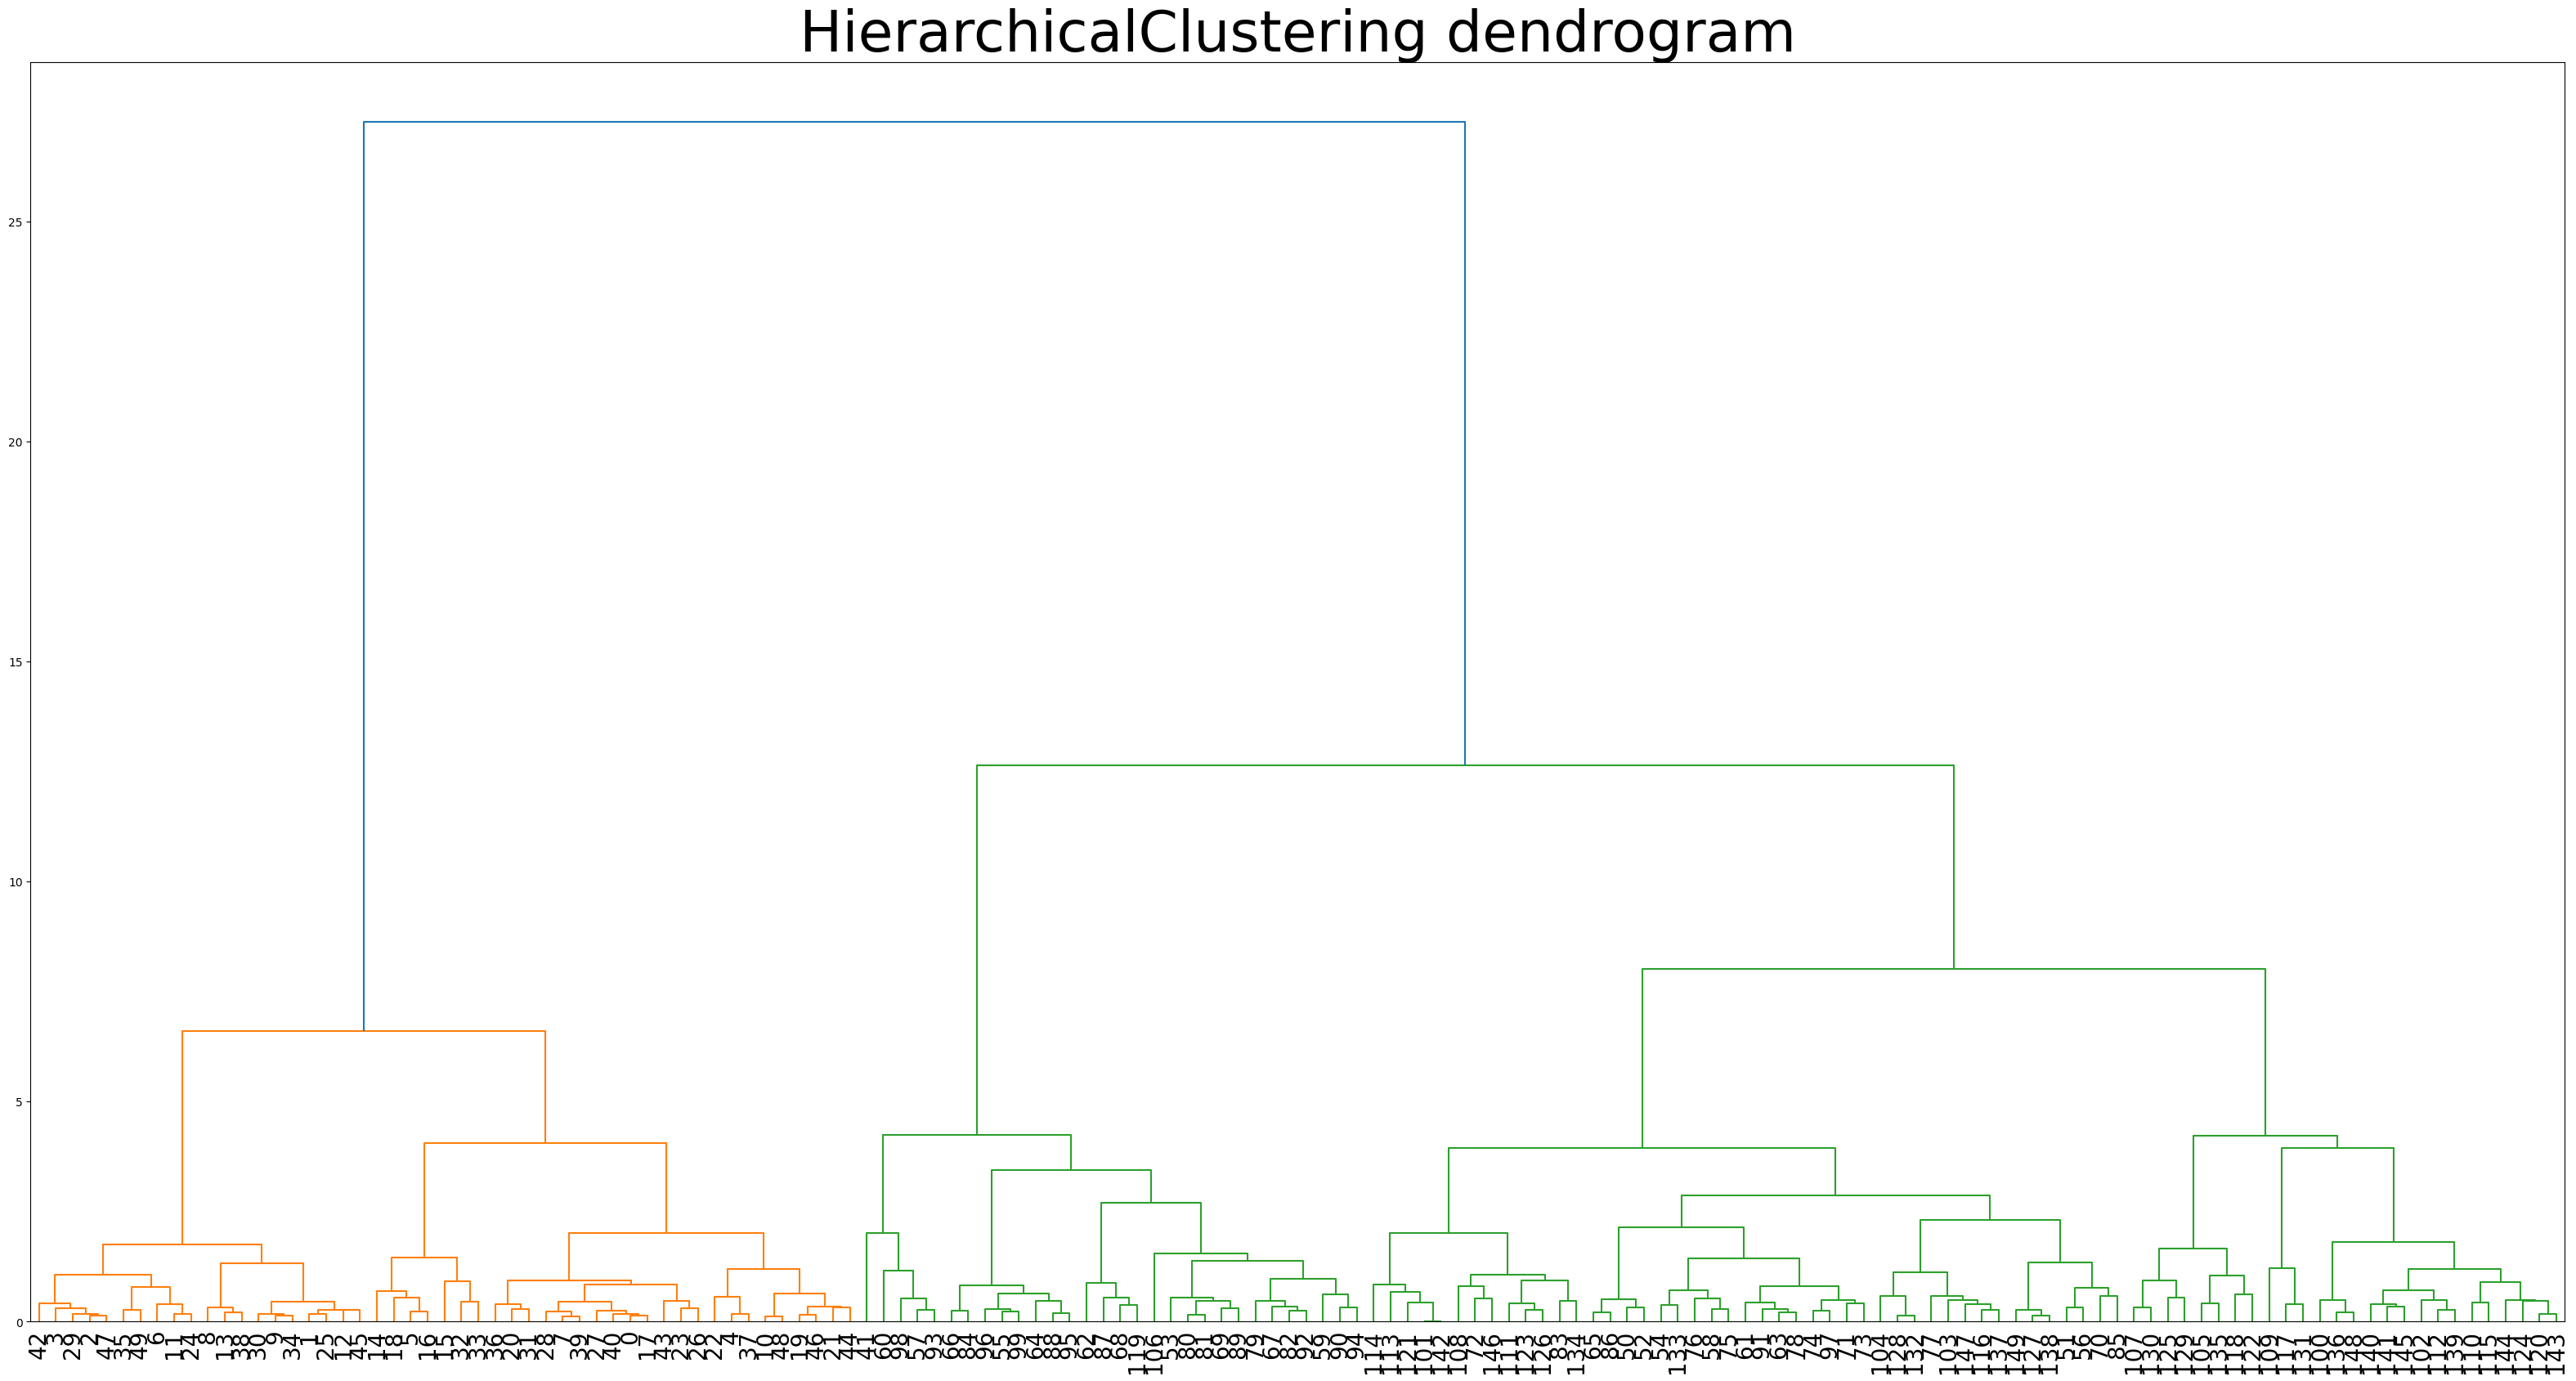

In [17]:
plt.figure(figsize=(40,20))
dendrogram(linkage_array,
          leaf_rotation=90,
           leaf_font_size=20
          )
plt.title('HierarchicalClustering dendrogram', fontsize=50)
plt.show()

In [8]:
?dendrogram

# 사이킷런에서 병합 군집 적용

클러스터를 측정하는 방법을 지정한다.

* ward : 기본값. 클러스터 내의 분산을 가장 작게 증가 시키는 두 클러스터를 합친다. 비교적 비슷한 클러스터가 생성된다.
* average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.
* complete : 최대 연결법이라고도 한다. 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다.

In [20]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                             metric='euclidean',
                             linkage='ward')

labels = ac.fit_predict(X_scaled)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


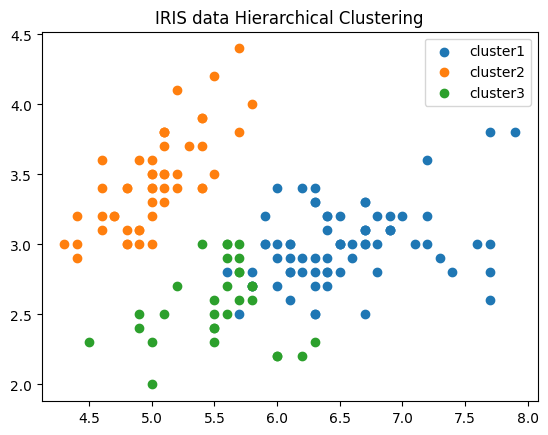

In [21]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster3')

plt.legend()
plt.title("IRIS data Hierarchical Clustering")
plt.show()

## 실습하기
1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```
2. 읽어들인 데이터에 대해서 스케일링을 수행하시오.
3.  Hierarchical Clustering을 수행하고 결과를 확인하시오.